## Boston Housing Dataset
  
Volvemos a evaluar este conjunto de datos pero en este caso para ver si podemos obtener un modelo que nos permita predecir los precios de venta de las casas en base a sus atributos (features).



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd

df = pd.read_csv("data/boston_house_prices.csv", header=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
corr = df.corr(numeric_only=True)
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

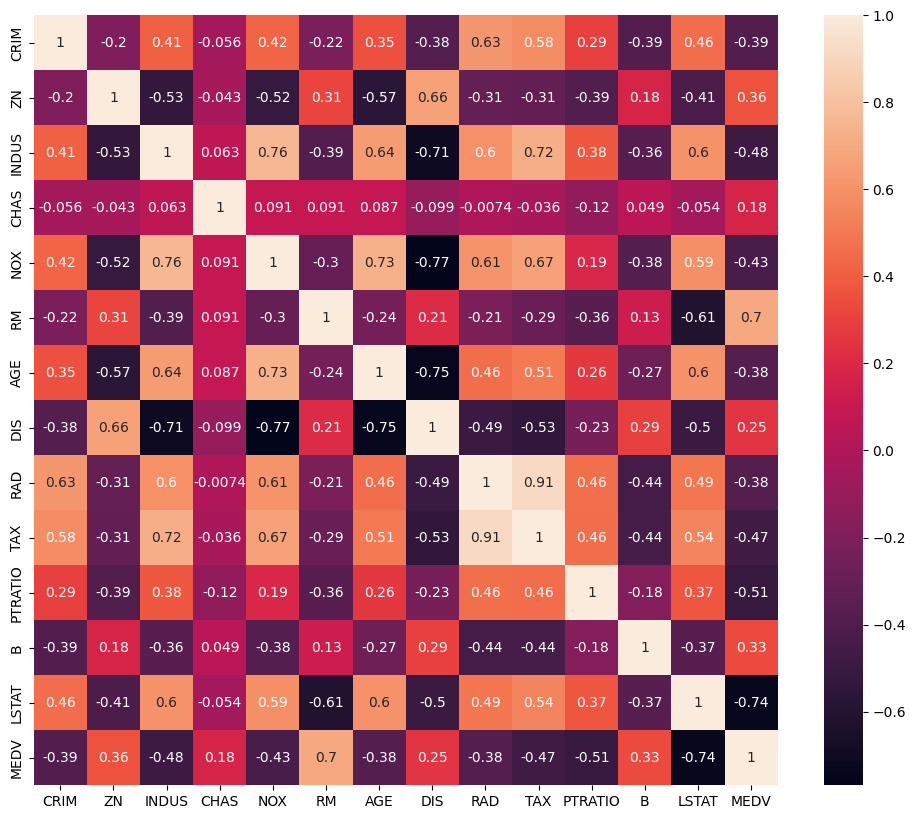

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True)

In [5]:
X = df.drop("MEDV", axis=1) 
y = df["MEDV"]           

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente R²: {r2:.2f}")

Error cuadrático medio (MSE): 21.81
Coeficiente R²: 0.70


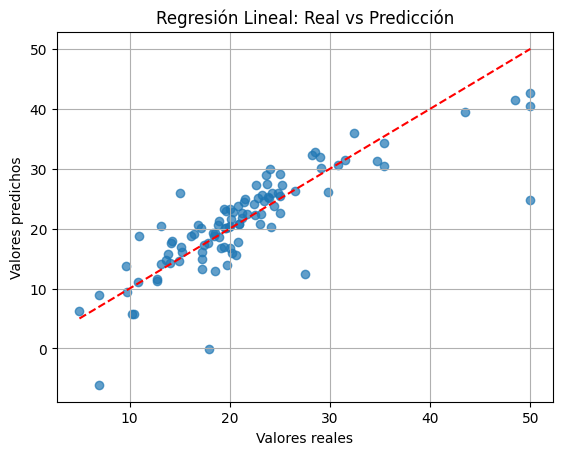

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Regresión Lineal: Real vs Predicción")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(X)

X_poly = poly_feats.transform(X)
X_poly

array([[1.00000000e+00, 6.32000000e-03, 1.80000000e+01, ...,
        1.57529610e+05, 1.97656200e+03, 2.48004000e+01],
       [1.00000000e+00, 2.73100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.62766600e+03, 8.35396000e+01],
       [1.00000000e+00, 2.72900000e-02, 0.00000000e+00, ...,
        1.54315409e+05, 1.58310490e+03, 1.62409000e+01],
       ...,
       [1.00000000e+00, 6.07600000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 2.23851600e+03, 3.18096000e+01],
       [1.00000000e+00, 1.09590000e-01, 0.00000000e+00, ...,
        1.54802902e+05, 2.54955600e+03, 4.19904000e+01],
       [1.00000000e+00, 4.74100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.12757200e+03, 6.20944000e+01]], shape=(506, 105))

In [ ]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [ ]:
pol_reg.coef_

array([-7.97162270e+08, -4.47560359e+00,  1.86323597e-01, -4.64950095e+00,
        2.99096233e+01,  1.34635791e+02,  2.17266153e+01,  9.03246738e-01,
       -7.41923580e+00,  1.81653477e+00,  6.19430933e-02,  6.44945686e+00,
        1.29947837e-01,  7.34742201e-01,  1.99793216e-03,  3.34741125e-01,
        4.02550006e-01,  2.48205703e+00, -7.14321228e-01,  1.12808887e-01,
       -4.73501123e-03, -7.47335013e-02,  1.92804227e-01, -2.34199263e-02,
        3.90169990e-01, -1.98657113e-04,  1.92372210e-02, -2.22418640e-05,
       -3.24688054e-03, -2.03088751e-02, -1.09333125e+00,  5.95574382e-03,
        7.60547028e-04, -1.01172276e-02, -1.24850944e-02,  6.80604587e-04,
       -2.25603444e-03,  5.52624070e-04, -6.38574403e-03,  5.25691014e-02,
        3.12674057e-02,  1.07836182e+00,  2.31660106e-01,  4.99638578e-03,
        1.74692246e-01, -3.28419255e-02,  7.66482944e-04, -3.69484778e-02,
        3.30999945e-03, -1.52964974e-02,  2.99096224e+01, -3.41842948e+01,
       -5.52330679e+00, -

In [ ]:
import numpy as np

np.dot(pol_reg.coef_, X_poly.T) + pol_reg.intercept_

array([24.3257612 , 21.70742309, 31.45342147, 31.95919538, 32.07212019,
       26.10454524, 21.34575129, 17.67411387, 16.36192667, 20.29943585,
       19.91724861, 20.23052883, 23.96145451, 19.6529305 , 18.22623122,
       19.42505932, 21.39045072, 17.2018621 , 13.16257799, 18.3190372 ,
       14.36456108, 16.82459056, 15.94069552, 14.0198971 , 15.32403779,
       14.68252099, 15.67004573, 15.66516936, 17.70622587, 19.69532406,
       14.74991596, 16.45054364, 15.57771456, 15.09033227, 14.98173928,
       23.21955764, 22.1141957 , 22.75332546, 24.08637559, 29.0826689 ,
       35.22468662, 30.75417042, 23.24988258, 25.0444237 , 21.98865497,
       19.2110424 , 21.16608918, 18.83638871, 18.62922597, 18.79638529,
       21.20877659, 21.15733433, 27.28492272, 21.8687048 , 17.99705398,
       31.36499548, 25.11179471, 29.67087841, 20.04769194, 18.55793059,
       17.67108095, 18.2186296 , 22.70828831, 24.45363867, 31.12562859,
       26.25592649, 19.23983538, 18.90538359, 16.7105186 , 18.38

In [ ]:
pol_reg.predict(X_poly)

array([24.3257612 , 21.70742309, 31.45342147, 31.95919538, 32.07212019,
       26.10454524, 21.34575129, 17.67411387, 16.36192667, 20.29943585,
       19.91724861, 20.23052883, 23.96145451, 19.6529305 , 18.22623122,
       19.42505932, 21.39045072, 17.2018621 , 13.16257799, 18.3190372 ,
       14.36456108, 16.82459056, 15.94069552, 14.0198971 , 15.32403779,
       14.68252099, 15.67004573, 15.66516936, 17.70622587, 19.69532406,
       14.74991596, 16.45054364, 15.57771456, 15.09033227, 14.98173928,
       23.21955764, 22.1141957 , 22.75332546, 24.08637559, 29.0826689 ,
       35.22468662, 30.75417042, 23.24988258, 25.0444237 , 21.98865497,
       19.2110424 , 21.16608918, 18.83638871, 18.62922597, 18.79638529,
       21.20877659, 21.15733433, 27.28492272, 21.8687048 , 17.99705398,
       31.36499548, 25.11179471, 29.67087841, 20.04769194, 18.55793059,
       17.67108095, 18.2186296 , 22.70828831, 24.45363867, 31.12562859,
       26.25592649, 19.23983538, 18.90538359, 16.7105186 , 18.38

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_pred = pol_reg.predict(X_poly)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 1.90
MSE: 6.42
RMSE: 2.53
R² Score: 0.92


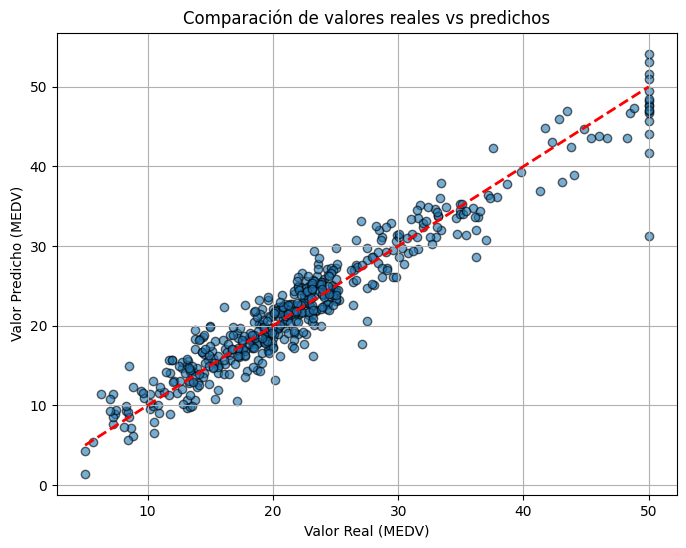

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Línea de identidad
plt.xlabel("Valor Real (MEDV)")
plt.ylabel("Valor Predicho (MEDV)")
plt.title("Comparación de valores reales vs predichos")
plt.grid(True)
plt.show()

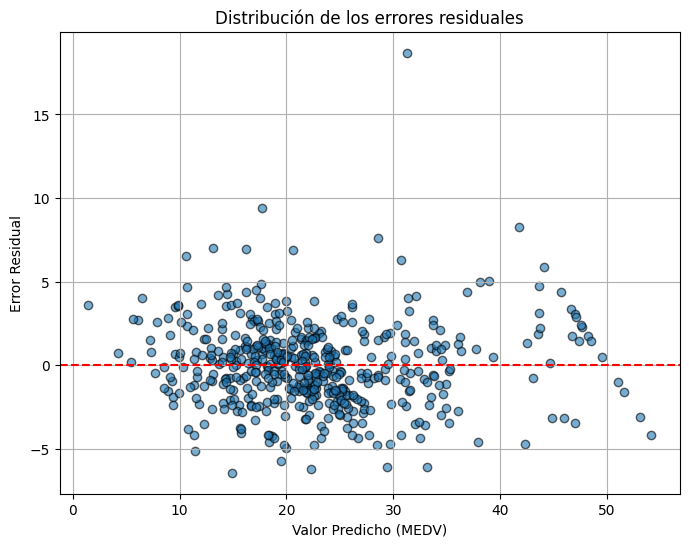

In [ ]:
residuals = y - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valor Predicho (MEDV)")
plt.ylabel("Error Residual")
plt.title("Distribución de los errores residuales")
plt.grid(True)
plt.show()